In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
import numpy as np
from LinearMPC_template.MPCVelControl import MPCVelControl

from LinearMPC_template.MPCControl_xvel import MPCControl_xvel
from LinearMPC_template.MPCControl_xvel import MPCControl_xvel_tuned_default
from LinearMPC_template.MPCControl_xvel import MPCControl_xvel_tuned_final

from LinearMPC_template.MPCControl_yvel import MPCControl_yvel
from LinearMPC_template.MPCControl_yvel import MPCControl_yvel_tuned_default
from LinearMPC_template.MPCControl_yvel import MPCControl_yvel_tuned_final

from LinearMPC_template.MPCControl_zvel import MPCControl_zvel
from LinearMPC_template.MPCControl_zvel import MPCControl_zvel_tuned_default
from LinearMPC_template.MPCControl_zvel import MPCControl_zvel_tuned_final

from LinearMPC_template.MPCControl_roll import MPCControl_roll
from LinearMPC_template.MPCControl_roll import MPCControl_roll_tuned_default
from LinearMPC_template.MPCControl_roll import MPCControl_roll_tuned_final

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
import matplotlib.pyplot as plt
from plot_style import set_mpc_style
set_mpc_style()

Ts = 0.05
sim_time = 7.0
H = 5.0
N = int(H / Ts)

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Maximum invariant set successfully computed after 10 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Iteration 10... not yet converged

Iteration 11... not yet converged

Iteration 12... not yet converged

Iteration 13... not yet converged

Maximum invariant set successfully computed after 14 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... n

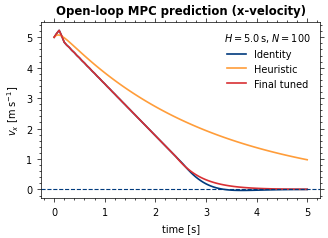

Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Maximum invariant set successfully computed after 10 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Iteration 10... not yet converged

Iteration 11... not yet converged

Iteration 12... not yet converged

Iteration 13... not yet converged

Maximum invariant set successfully computed after 14 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... n

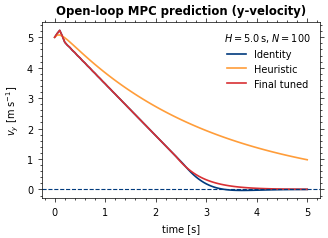

Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 1 iterations.


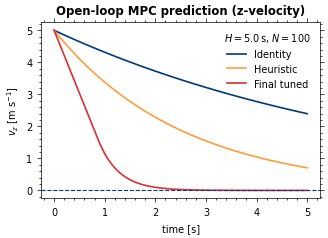

Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Iteration 10... not yet converged

Iteration 11... not yet converged

Iteration 12... not yet converged

Iteration 13... not yet converged

Iteration 14... not yet converged

Iteration 15... not yet converged

Iteration 16... not yet converged

Iteration 17... not yet converged

Iteration 18... not yet converged

Iteration 19... not yet converged

Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Iteration 10... not yet converged

Ite

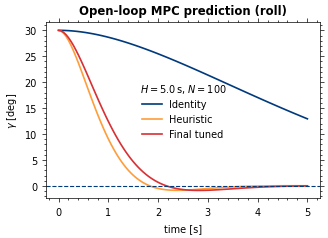

In [4]:
# Open-loop MPC prediction for x-velocity controller
# --- build three controllers ---
mpc_x_I   = MPCControl_xvel(A, B, xs, us, Ts, H)
mpc_x_td  = MPCControl_xvel_tuned_default(A, B, xs, us, Ts, H)
mpc_x_tf  = MPCControl_xvel_tuned_final(A, B, xs, us, Ts, H)

x0_x = xs.copy()
x0_x[6] += 5.0  # v_x = 5 m/s

_, xI,  _ = mpc_x_I.get_u(x0_x[mpc_x_I.x_ids])
_, xTD, _ = mpc_x_td.get_u(x0_x[mpc_x_td.x_ids])
_, xTF, _ = mpc_x_tf.get_u(x0_x[mpc_x_tf.x_ids])

t_ol = np.arange(xI.shape[1]) * Ts

vx_local_idx = 2  # for x_ids=[1,4,6] -> [w_y, beta, v_x]

plt.figure(figsize=(3.4, 2.5))
plt.plot(t_ol, xI[vx_local_idx, :],  label="Identity")
plt.plot(t_ol, xTD[vx_local_idx, :], label=r"Heuristic")
plt.plot(t_ol, xTF[vx_local_idx, :], label="Final tuned")
plt.axhline(0.0, linestyle="--", linewidth=0.8)
plt.xlabel(r"time [s]")
plt.ylabel(r"$v_x$ [m s$^{-1}$]")
plt.title("Open-loop MPC prediction (x-velocity)")
plt.legend(
    title=fr"$H={H}\,$s, $N={int(H/Ts)}$",
    frameon=False,
    fontsize=7,
    title_fontsize=7
)
plt.tight_layout()
plt.show()

# Open-loop MPC prediction for y-velocity controller
mpc_y_I  = MPCControl_yvel(A, B, xs, us, Ts, H)
mpc_y_td = MPCControl_yvel_tuned_default(A, B, xs, us, Ts, H)
mpc_y_tf = MPCControl_yvel_tuned_final(A, B, xs, us, Ts, H)

x0_y = xs.copy()
x0_y[7] += 5.0

_, xI,  _ = mpc_y_I.get_u(x0_y[mpc_y_I.x_ids])
_, xTD, _ = mpc_y_td.get_u(x0_y[mpc_y_td.x_ids])
_, xTF, _ = mpc_y_tf.get_u(x0_y[mpc_y_tf.x_ids])

t_ol = np.arange(xI.shape[1]) * Ts
vy_local_idx = list(mpc_y_I.x_ids).index(7)

plt.figure(figsize=(3.4, 2.5))
plt.plot(t_ol, xI[vy_local_idx, :],  label="Identity")
plt.plot(t_ol, xTD[vy_local_idx, :], label=r"Heuristic")
plt.plot(t_ol, xTF[vy_local_idx, :], label="Final tuned")
plt.axhline(0.0, linestyle="--", linewidth=0.8)
plt.xlabel(r"time [s]")
plt.ylabel(r"$v_y$ [m s$^{-1}$]")
plt.title("Open-loop MPC prediction (y-velocity)")
plt.legend(
    title=fr"$H={H}\,$s, $N={int(H/Ts)}$",
    frameon=False,
    fontsize=7,
    title_fontsize=7
)
plt.tight_layout()
plt.show()

# Open-loop MPC prediction for z-velocity controller
mpc_z_I  = MPCControl_zvel(A, B, xs, us, Ts, H)
mpc_z_td = MPCControl_zvel_tuned_default(A, B, xs, us, Ts, H)
mpc_z_tf = MPCControl_zvel_tuned_final(A, B, xs, us, Ts, H)

x0_z = xs.copy()
x0_z[8] += 5.0

_, xI,  _ = mpc_z_I.get_u(x0_z[mpc_z_I.x_ids])
_, xTD, _ = mpc_z_td.get_u(x0_z[mpc_z_td.x_ids])
_, xTF, _ = mpc_z_tf.get_u(x0_z[mpc_z_tf.x_ids])

t_ol = np.arange(xI.shape[1]) * Ts
vz_local_idx = list(mpc_z_I.x_ids).index(8)

plt.figure(figsize=(3.4, 2.5))
plt.plot(t_ol, xI[vz_local_idx, :],  label="Identity")
plt.plot(t_ol, xTD[vz_local_idx, :], label=r"Heuristic")
plt.plot(t_ol, xTF[vz_local_idx, :], label="Final tuned")
plt.axhline(0.0, linestyle="--", linewidth=0.8)
plt.xlabel(r"time [s]")
plt.ylabel(r"$v_z$ [m s$^{-1}$]")
plt.title("Open-loop MPC prediction (z-velocity)")
plt.legend(
    title=fr"$H={H}\,$s, $N={int(H/Ts)}$",
    frameon=False,
    fontsize=7,
    title_fontsize=7
)
plt.tight_layout()
plt.show()


# Open-loop MPC prediction for roll-rate controller
mpc_r_I  = MPCControl_roll(A, B, xs, us, Ts, H)
mpc_r_td = MPCControl_roll_tuned_default(A, B, xs, us, Ts, H)
mpc_r_tf = MPCControl_roll_tuned_final(A, B, xs, us, Ts, H)

x0_gamma = xs.copy()
x0_gamma[5] = np.deg2rad(30)   # γ = 30°

_, xI,  _ = mpc_r_I.get_u(x0_gamma[mpc_r_I.x_ids])
_, xTD, _ = mpc_r_td.get_u(x0_gamma[mpc_r_td.x_ids])
_, xTF, _ = mpc_r_tf.get_u(x0_gamma[mpc_r_tf.x_ids])

t_ol = np.arange(xI.shape[1]) * Ts
gamma_idx = 1  # local index in [ω_z, γ]

plt.figure(figsize=(3.4, 2.5))
plt.plot(t_ol, np.rad2deg(xI[gamma_idx]),  label="Identity")
plt.plot(t_ol, np.rad2deg(xTD[gamma_idx]), label=r"Heuristic")
plt.plot(t_ol, np.rad2deg(xTF[gamma_idx]), label="Final tuned")
plt.axhline(0.0, linestyle="--", linewidth=0.8)
plt.xlabel(r"time [s]")
plt.ylabel(r"$\gamma$ [deg]")
plt.title("Open-loop MPC prediction (roll)")
plt.legend(
    title=fr"$H={H}\,$s, $N={int(H/Ts)}$",
    frameon=False,
    fontsize=7,
    title_fontsize=7
)
plt.tight_layout()
plt.show()


Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Maximum invariant set successfully computed after 10 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Iteration 10... not yet converged

Iteration 11... not yet converged

Iteration 12... not yet converged

Iteration 13... not yet converged

Maximum invariant set successfully computed after 14 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... n

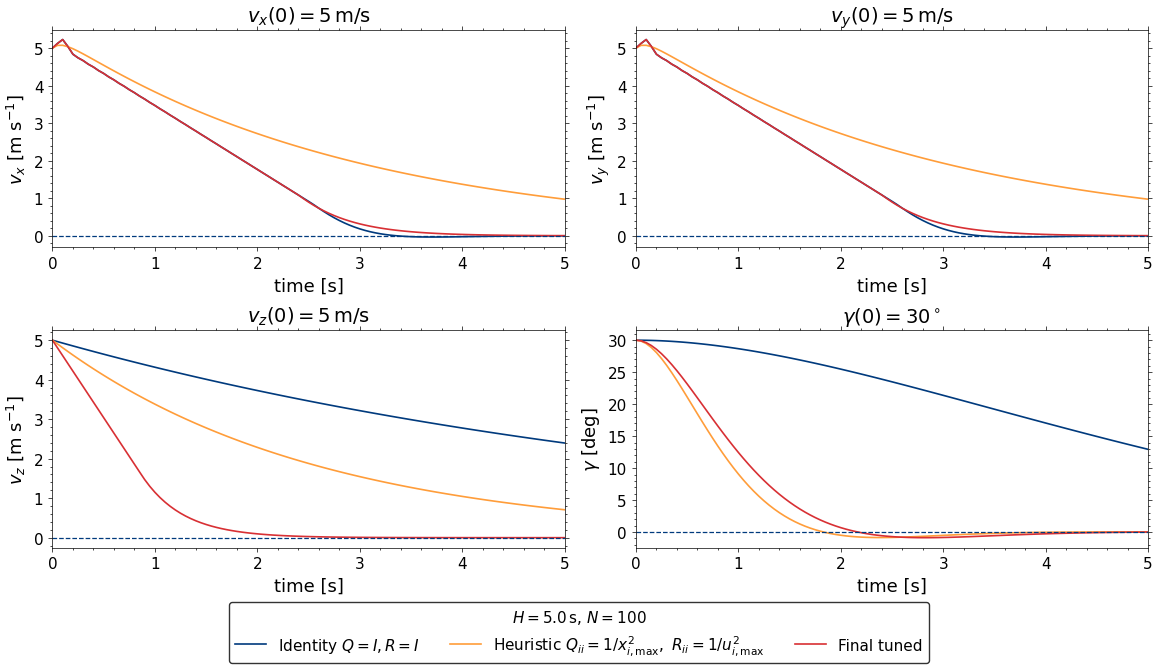

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- helper ----------
def run_open_loop(mpc_cls, A, B, xs, us, Ts, H, x0_full, state_full_idx,
                  y_transform=lambda y: y):
    mpc = mpc_cls(A, B, xs, us, Ts, H)
    x0_sub = x0_full[mpc.x_ids]
    _, x_ol, _ = mpc.get_u(x0_sub)

    t = np.arange(x_ol.shape[1]) * Ts
    local_idx = list(mpc.x_ids).index(state_full_idx)
    y = y_transform(x_ol[local_idx, :])
    return t, y


# ---------- initial conditions ----------
x0_x = xs.copy(); x0_x[6] += 5.0
x0_y = xs.copy(); x0_y[7] += 5.0
x0_z = xs.copy(); x0_z[8] += 5.0
x0_r = xs.copy(); x0_r[5]  = np.deg2rad(30.0)

# ---------- controller sets ----------
ctrl_sets = {
    "Identity $Q=I,R=I$": (
        MPCControl_xvel, MPCControl_yvel,
        MPCControl_zvel, MPCControl_roll
    ),
    r"Heuristic $Q_{ii}=1/x_{i,\max}^2,\ R_{ii}=1/u_{i,\max}^2$": (
        MPCControl_xvel_tuned_default,
        MPCControl_yvel_tuned_default,
        MPCControl_zvel_tuned_default,
        MPCControl_roll_tuned_default
    ),
    "Final tuned": (
        MPCControl_xvel_tuned_final,
        MPCControl_yvel_tuned_final,
        MPCControl_zvel_tuned_final,
        MPCControl_roll_tuned_final
    ),
}

# ---------- figure ----------
fig, axs = plt.subplots(2, 2, figsize=(11.69, 6.8))

fig.suptitle(
    "Open-loop MPC predictions for velocity and roll subsystems",
    fontsize=16,
    fontweight="bold",
    y=0.98
)

LABEL_FONTSIZE = 13
TICK_FONTSIZE  = 11
TITLE_FONTSIZE = 14
LEGEND_FONTSIZE = 11

def format_ax(ax, title, ylabel):
    ax.set_title(title, fontsize=TITLE_FONTSIZE, fontweight="bold")
    ax.set_xlabel(r"time [s]", fontsize=LABEL_FONTSIZE)
    ax.set_ylabel(ylabel, fontsize=LABEL_FONTSIZE)
    ax.axhline(0.0, linestyle="--", linewidth=0.9)
    ax.set_xlim(0, H)
    ax.tick_params(labelsize=TICK_FONTSIZE)

# ---------- X velocity ----------
ax = axs[0, 0]
for lbl, (cx, cy, cz, cr) in ctrl_sets.items():
    t, y = run_open_loop(cx, A, B, xs, us, Ts, H, x0_x, 6)
    ax.plot(t, y, label=lbl)
format_ax(ax, r"$v_x(0)=5\,\mathrm{m/s}$", r"$v_x$ [m s$^{-1}$]")

# ---------- Y velocity ----------
ax = axs[0, 1]
for lbl, (cx, cy, cz, cr) in ctrl_sets.items():
    t, y = run_open_loop(cy, A, B, xs, us, Ts, H, x0_y, 7)
    ax.plot(t, y, label=lbl)
format_ax(ax, r"$v_y(0)=5\,\mathrm{m/s}$", r"$v_y$ [m s$^{-1}$]")

# ---------- Z velocity ----------
ax = axs[1, 0]
for lbl, (cx, cy, cz, cr) in ctrl_sets.items():
    t, y = run_open_loop(cz, A, B, xs, us, Ts, H, x0_z, 8)
    ax.plot(t, y, label=lbl)
format_ax(ax, r"$v_z(0)=5\,\mathrm{m/s}$", r"$v_z$ [m s$^{-1}$]")

# ---------- Roll angle ----------
ax = axs[1, 1]
for lbl, (cx, cy, cz, cr) in ctrl_sets.items():
    t, y = run_open_loop(cr, A, B, xs, us, Ts, H, x0_r, 5, np.rad2deg)
    ax.plot(t, y, label=lbl)
ax.set_title(r"$\gamma(0)=30^\circ$", fontsize=TITLE_FONTSIZE, fontweight="bold")
ax.set_xlabel(r"time [s]", fontsize=LABEL_FONTSIZE)
ax.set_ylabel(r"$\gamma$ [deg]", fontsize=LABEL_FONTSIZE)
ax.axhline(0.0, linestyle="--", linewidth=0.9)
ax.set_xlim(0, H)
ax.tick_params(labelsize=TICK_FONTSIZE)

# ---------- legend ----------
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc="lower center",
    ncol=3,
    fontsize=LEGEND_FONTSIZE,
    frameon=True,
    fancybox=True,
    edgecolor="black",
    title=fr"$H={H}\,$s, $N={int(H/Ts)}$",
    title_fontsize=LEGEND_FONTSIZE
)

plt.tight_layout(rect=[0, 0.10, 1, 0.95])

# ---------- save ----------
fig.savefig("openloop_mpc_2x2_a4wide.pdf", bbox_inches="tight")
plt.show()


Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Iteration 10... not yet converged

Iteration 11... not yet converged

Iteration 12... not yet converged

Iteration 13... not yet converged

Maximum invariant set successfully computed after 14 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Iteration 10... not yet converged

Iteration 11... not yet converged

Iteration 12... not yet converged

Iteration 13... not yet converged

Maximum invariant set successfully computed

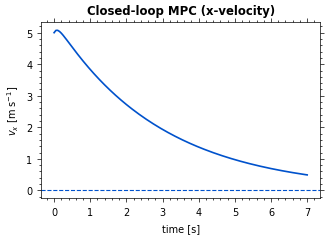

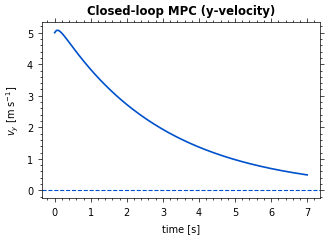

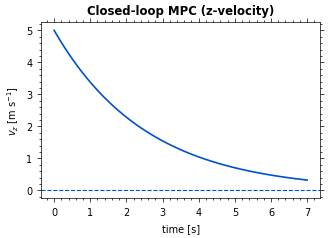

In [10]:
mpc = MPCVelControl().new_controller(rocket, Ts, H)

x0 = xs.copy()
x0[6] += 5.0  # v_x
x0[7] += 5.0  # v_y
x0[8] += 5.0  # v_z

t_cl, x_cl, u_cl, *_ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear"
)

# v_x
plt.figure(figsize=(3.4, 2.5))
plt.plot(t_cl, x_cl[6, :])
plt.axhline(0, linestyle="--", linewidth=0.8)
plt.xlabel(r"time [s]")
plt.ylabel(r"$v_x$ [m s$^{-1}$]")
plt.title("Closed-loop MPC (x-velocity)")
plt.tight_layout()
plt.show()

# v_y
plt.figure(figsize=(3.4, 2.5))
plt.plot(t_cl, x_cl[7, :])
plt.axhline(0, linestyle="--", linewidth=0.8)
plt.xlabel(r"time [s]")
plt.ylabel(r"$v_y$ [m s$^{-1}$]")
plt.title("Closed-loop MPC (y-velocity)")
plt.tight_layout()
plt.show()

# v_z
plt.figure(figsize=(3.4, 2.5))
plt.plot(t_cl, x_cl[8, :])
plt.axhline(0, linestyle="--", linewidth=0.8)
plt.xlabel(r"time [s]")
plt.ylabel(r"$v_z$ [m s$^{-1}$]")
plt.title("Closed-loop MPC (z-velocity)")
plt.tight_layout()
plt.show()
